![image.png](task_image.png)

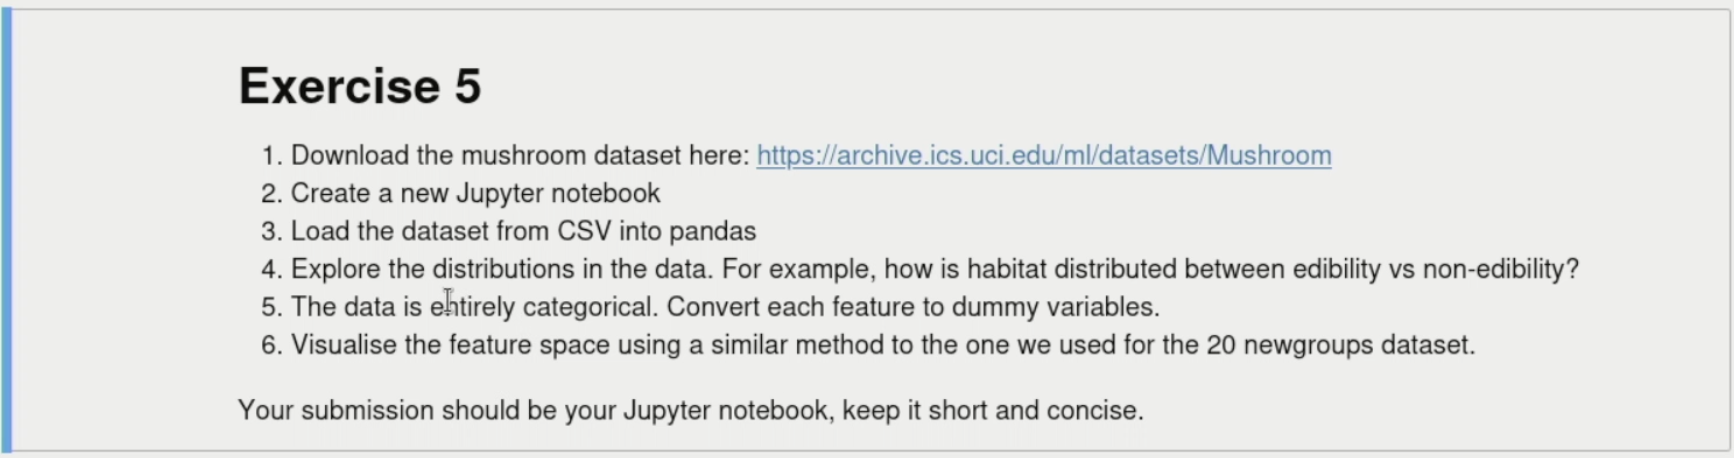

In [88]:
import math

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



In [89]:

df = pd.read_csv("../data/mushrooms/mushroomdata.csv")

df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [90]:
#Swapping the category letters for their actual values
a = """edible=e,poison=p
bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
fibrous=f,grooves=g,scaly=y,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises=t,no=f
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
attached=a,descending=d,free=f,notched=n
close=c,crowded=w,distant =d
broad=b,narrow=n
black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
enlarging=e,tapering=t
bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
fibrous=f,scaly=y,silky=k,smooth=s
fibrous=f,scaly=y,silky=k,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
partial=p,universal=u
brown=n,orange=o,white=w,yellow=y
none=n,one=o,two=t
cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d"""
lines = a.split("\n")
list_of_dicts = [
    {value: key for key, value in (item.split("=") for item in line.split(","))}
    for line in lines
]
for l in a:
    print(a)








edible=e,poison=p
bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
fibrous=f,grooves=g,scaly=y,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises=t,no=f
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
attached=a,descending=d,free=f,notched=n
close=c,crowded=w,distant =d
broad=b,narrow=n
black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
enlarging=e,tapering=t
bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
fibrous=f,scaly=y,silky=k,smooth=s
fibrous=f,scaly=y,silky=k,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
partial=p,universal=u
brown=n,orange=o,white=w,yellow=y
none=n,one=o,two=t
cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
a

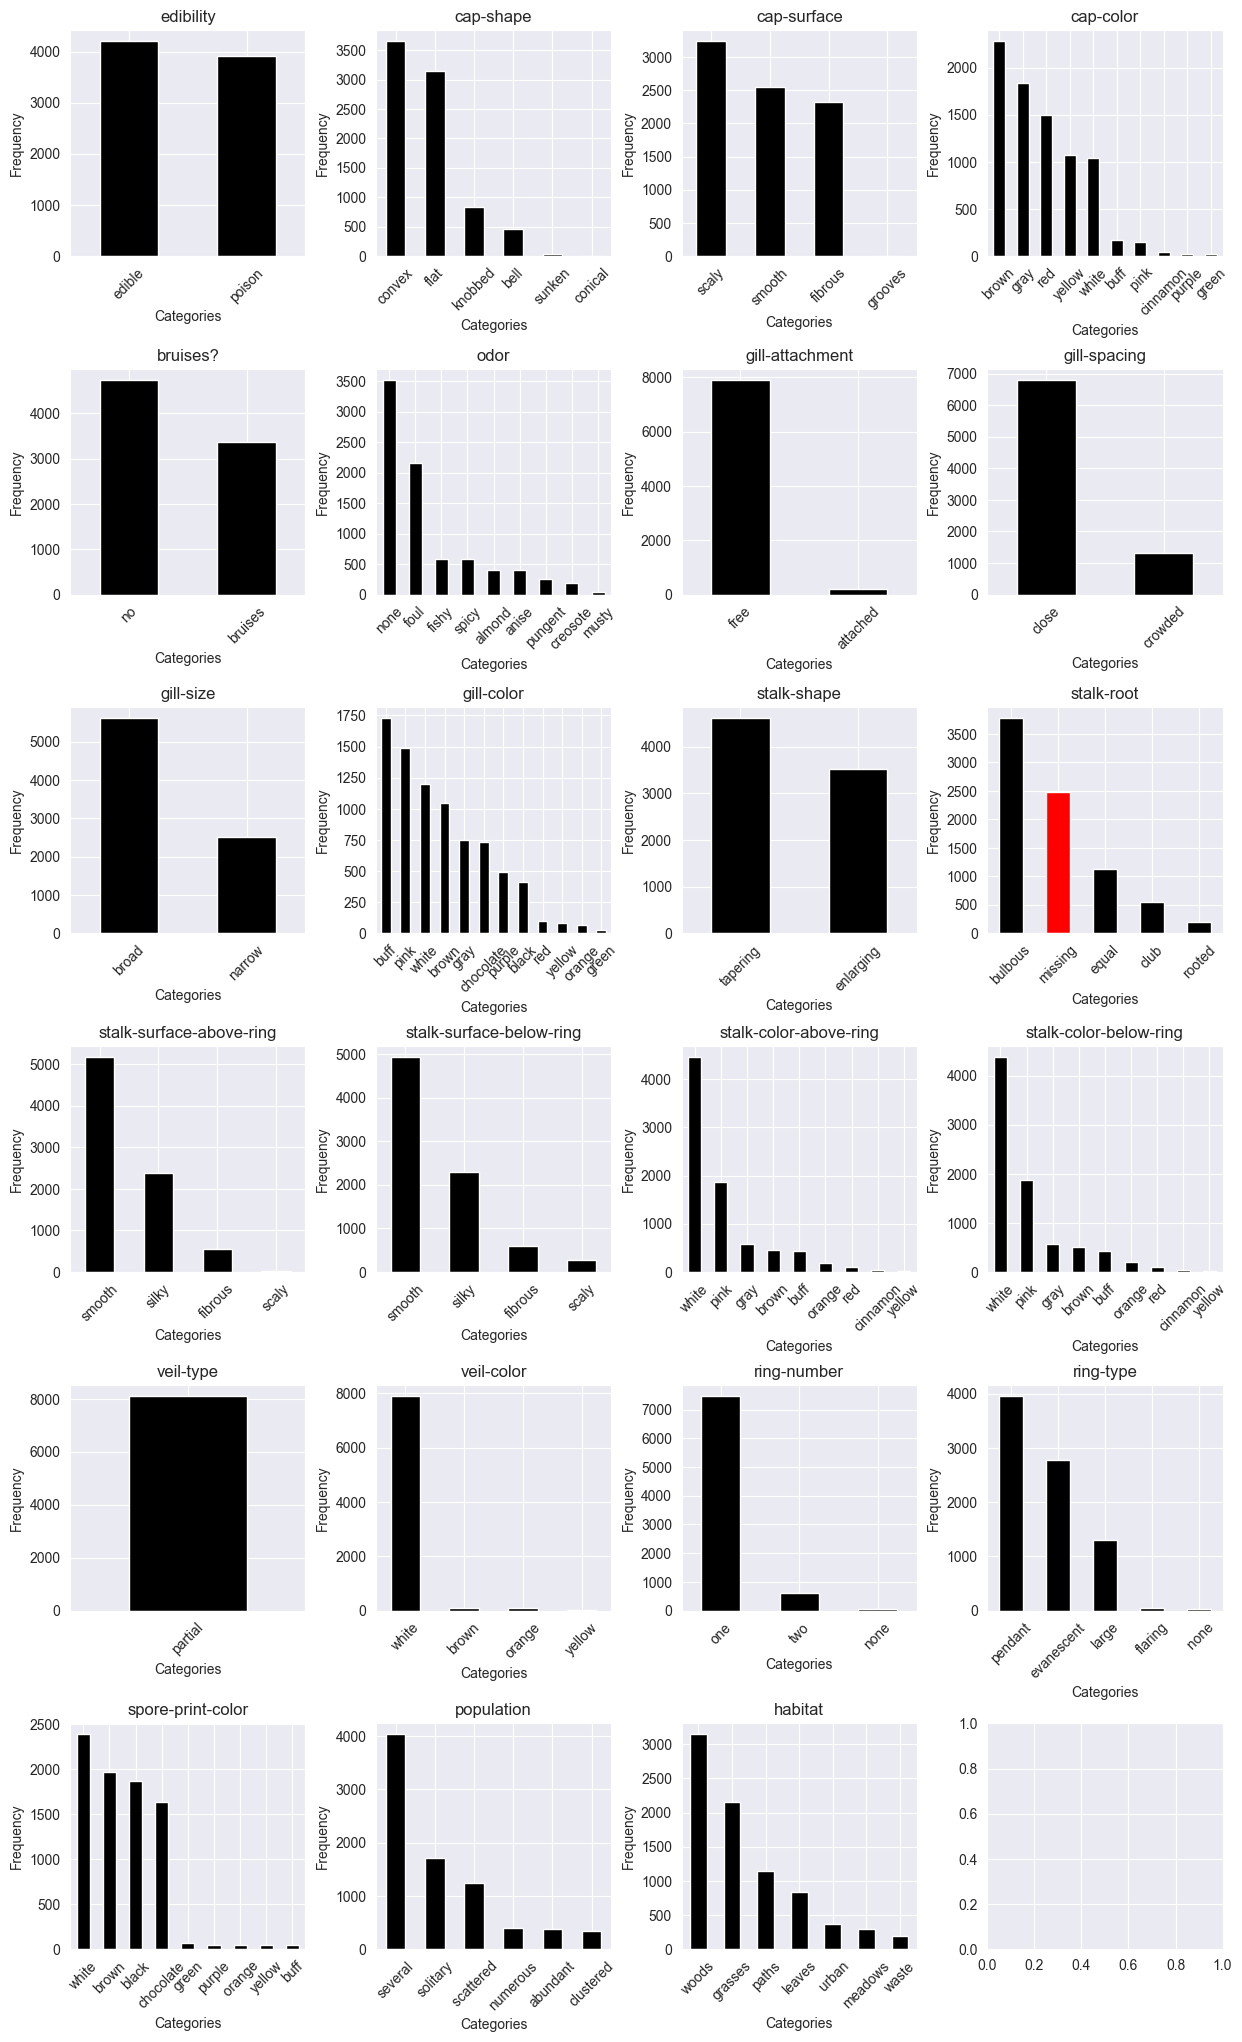

In [91]:
num_features = len(df.columns)

_, axes = plt.subplots(nrows=math.ceil(num_features / 4), ncols=4, figsize=(15, num_features))

axes = axes.flatten()
for col_index in range(num_features):
    ax = axes[col_index]

    value_counts = df.iloc[:, col_index].value_counts()

    colors = ['red' if name == '?' else 'black' for name in value_counts.index]
    print()
    value_counts.plot(ax=ax, kind='bar', color=colors)
    colNames = [list_of_dicts[col_index].get(name, name) for name in value_counts.index]
    #colNames = value_counts.index
    ax.set_title(f'{df.columns[col_index]}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(colNames, rotation=45)

plt.tight_layout(pad=10.0)  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust horizontal and vertical spacing

plt.show()



In [92]:
#krysstabell
def plotCrosstab(cat1, cat2): 
    cross_tab = pd.crosstab(df[cat1], df[cat2])
    cross_tab.plot(kind='bar', stacked=True)
    plt.show()




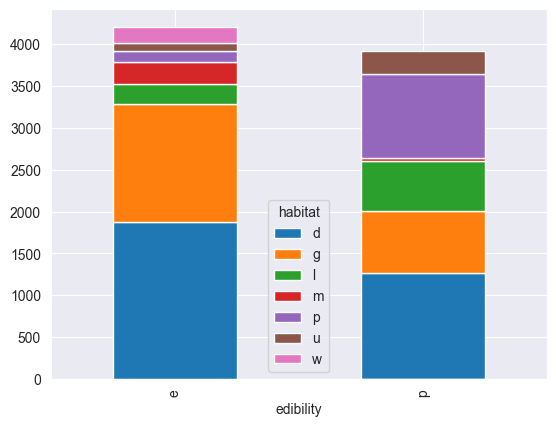

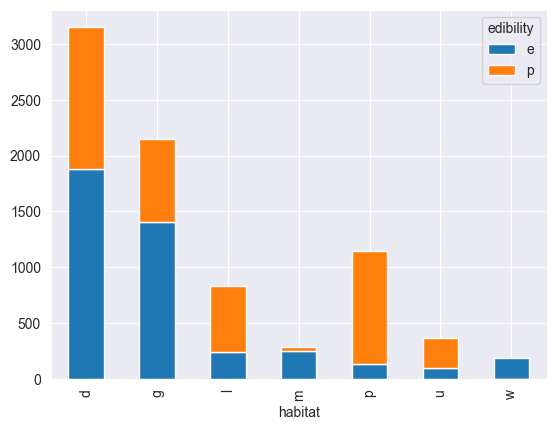

In [93]:
plotCrosstab("edibility", "habitat")
plotCrosstab("habitat", "edibility")

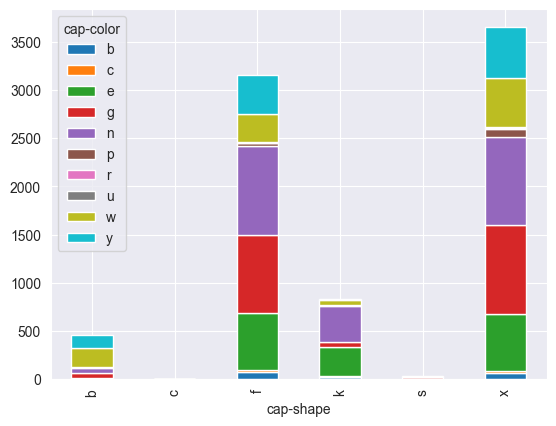

In [94]:
plotCrosstab("cap-shape", "cap-color")

In [95]:
dummies = pd.get_dummies(df)
display(dummies)#eller


,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


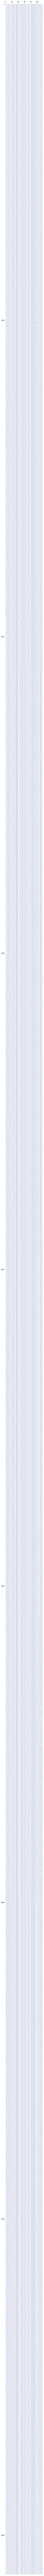

In [98]:
import numpy as np

#spying
#velger å shuffle slik at man ikke får et "unaturlig pattern"
#kunne antakeligvis også brukt "hierarcical clustering" for å kunne se andre mønster, altså legge de som ligner på hverandre i rekkefølge basert på et random startpunkt   
plt.spy(dummies, markersize=0.2)
fig = plt.gcf()
fig.set_size_inches(300,300)
plt.plot()
plt.show()

